# Heat Map

**Advantages of Heat Map:**

1. To represent a plot for discrete vs. another discrete variable.
2. As an alternative to transparency when the data points are enormous.

---

### Table of Contents

[Discret Bivariate HeatMap using plt.hist2d()]()

[Categorical HeatMap using sns.heatmap()]()

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [4]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### I. Using `plt.hist2d()` to draw heat map.

- Suitable for two discret numerical variables.
- Alternative way to the Scatter Plot.

#### Example 1: 



___Context:___ To continue with the study on the distribution pattern of data in the `efficiency` and `displacement` features using scatter plot, next we will use heat map as an alternative way.

In [7]:
fuel_econ.loc[:, ['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


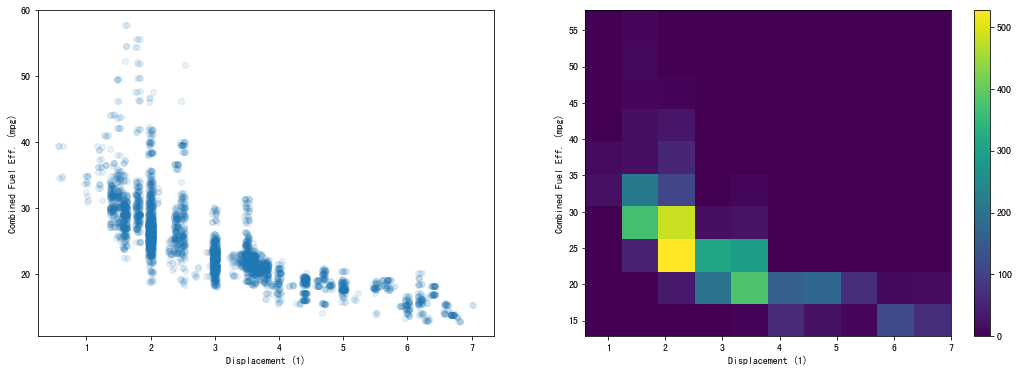

In [4]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**What does `cmin` do?**

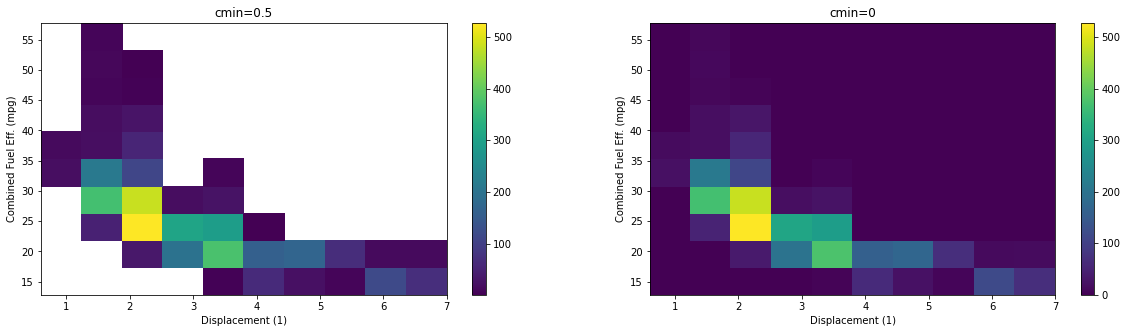

In [13]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("cmin=0.5");

plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0, cmap='viridis')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.title("cmin=0");

**The following implements two steps forward:**

- **Reverse the colormap (value-color order).**
- **Resize the bins of both features.**

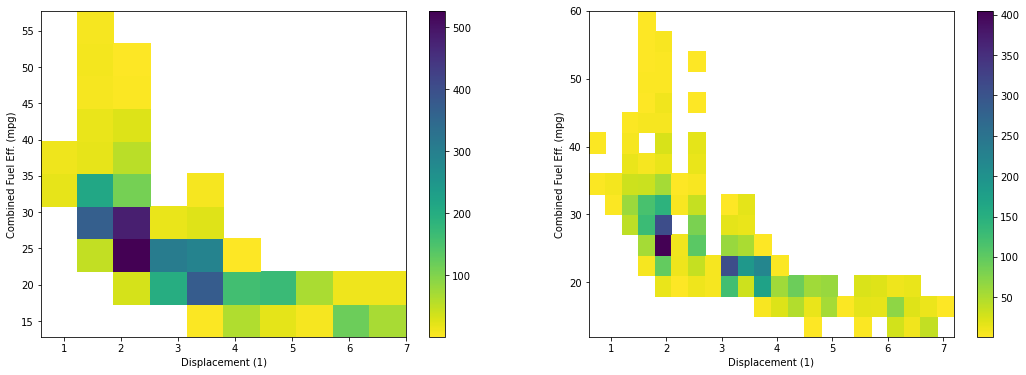

In [14]:
plt.figure(figsize = [18, 6])
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.subplot(121)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');



# Specify bin edges 
plt.subplot(122)
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

**Make annotations on the graph.**

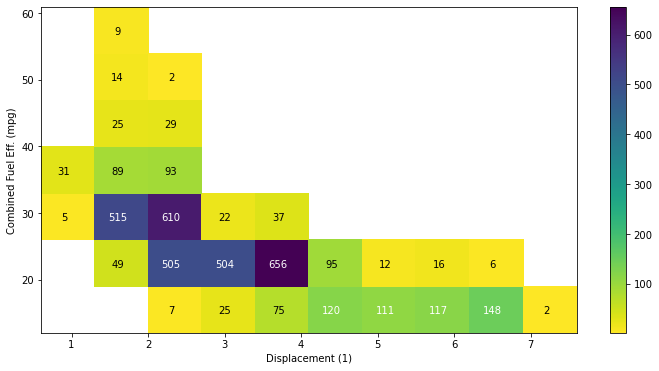

In [25]:
# Resize the figure size
plt.figure(figsize=(12, 6))

# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
# Light font color on deep bricks and vice versa.
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.3, bins_y[j]+3.3, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.3, bins_y[j]+3.3, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Another Example
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

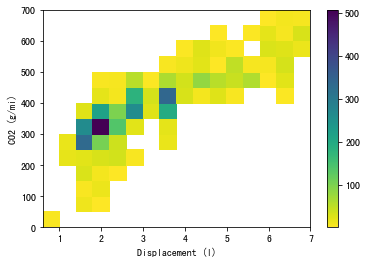

In [29]:
bins_x = np.arange(0.6, 7.4, 0.4)
bins_y = np.arange(0, 750, 50)
plt.hist2d(data=fuel_econ, x='displ', y='co2', cmin=1, cmap='viridis_r', bins=[bins_x,  bins_y])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)');

In the heat map, I've set up a color map that goes from light to dark, and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).

### II. Using `sns.heatmap()` to draw heat map.

**利用seaborn绘制热力图（分类型变量 V.S.分类型变量**

注意，不同于`sns.countplot()`，利用`sns.heatmap()`进行热力图绘制时，需要先对数据进行整理汇总，就像使用`plt.bar()`时的情形。行变量作为热力图中y轴上的变量，每个字段（列变量）作为热力图中x轴上的变量

#### Example 1: Count the numbers based on `VClass` and `trans_type` -- two categorical variables.

**Preparatory Step 1: Self-define a categorical data type.**

In [ ]:
# create a new column that only contains 'automatic' & 'manual' type
fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x:x.split()[0])

# Convert the "VClass" column from a plain object type into an ordered categorical type

# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

**Preparatory Step 2: Make summary on the dataset before drawing heat map。**

In [26]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a 
# pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type'])['id'].count()
ct_counts = ct_counts.reset_index(level=1)
ct_counts.reset_index(drop=False, inplace=True)
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='id')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


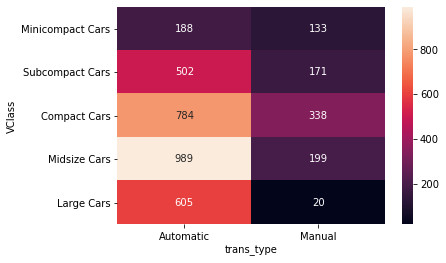

In [27]:
sns.heatmap(ct_counts, annot=True, fmt='d');

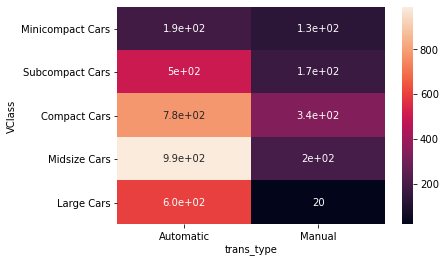

In [28]:
# If not designating `fmt` ...
sns.heatmap(ct_counts, annot=True);

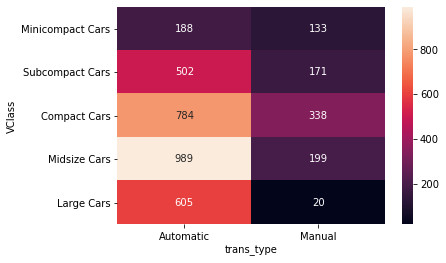

In [29]:
# Use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.
sns.heatmap(ct_counts, annot=True, fmt='.0f');